# LE1 – Prüfungs-Template (Python)

Dieses Notebook dient als schnelle **Arbeitsvorlage** für die 25‑Minuten‑Prüfung (LE1).
- Für **jede Teilaufgabe (1a–1g)** gibt es zuerst einen **Markdown‑Block** (Aufgabenbeschrieb) und direkt danach einen **Code‑Block** „meine Lösung“.
- Schreibe deinen Code **nur als Funktionen** (prüfungsfreundlich, wiederverwendbar).  
- Halte die Ausgabe knapp und füge kurze Kommentare hinzu.

## Aufgabe 1 (13 Punkte) – Aufgabenbeschrieb

Sie haben die Datei `autos.csv` erhalten, welche den Bremsweg von Autos bei verschiedenen Geschwindigkeiten beinhaltet.

**(a) (2 P)** Lesen Sie die Daten in R oder Python ein und stellen Sie den Bremsweg vs. die Geschwindigkeit grafisch dar.  
**(b) (2 P)** Führen Sie eine lineare Regression durch, um ein Modell für den Bremsweg zu finden. Sie dürfen dazu beliebige Libraries/Methoden benützen. Geben Sie die gefundene Gleichung hier an.  
**(c) (1 P)** Erstellen Sie eine zweite Grafik, in welcher die Regressionsgerade zusammen mit den Daten dargestellt ist.  
**(d) (2 P)** Berechnen Sie \(R^2\). Bewerten Sie die Qualität des Modells hier in Worten.  
**(e) (2 P)** Berechnen und plotten Sie die Residuen.  
**(f) (3 P)** Führen Sie einen Residuentest durch. Schreiben Sie sowohl die Testkriterien, wie auch die Resultate des Tests entweder hier oder in Ihrer Datei auf.  
**(g) (1 P)** Was ist Ihre Schlussfolgerung für das lineare Modell gemäss allen obigen Resultaten? Würden Sie das Modell ändern (wenn ja, wie? wenn nicht, warum ist es gut)?

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### (1a) Daten einlesen & Scatterplot – *meine Notizen*

In [ ]:
df = pd.read_csv('autos-1647012077(1).csv')
df.info()

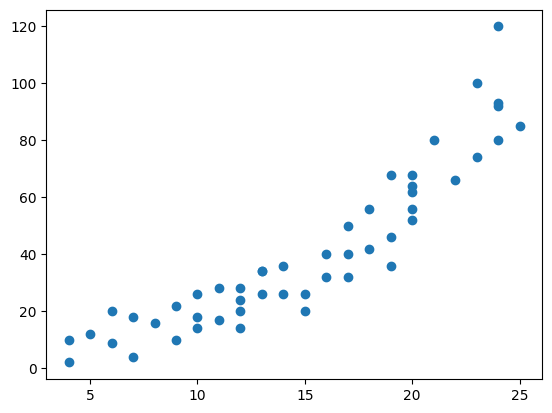

In [14]:

plt.scatter(df['geschwindigkeit'], df['distanz'])

### (1b) Lineare Regression (OLS) – *meine Notizen*

In [36]:
from sklearn.linear_model import LinearRegression

model_lin = LinearRegression().fit(df[['geschwindigkeit']], df[['distanz']])
print(model_lin.coef_, model_lin.intercept_)

[[4.26955569]] [-22.91255308]


In [32]:
import statsmodels.api as sm
X = sm.add_constant(df['geschwindigkeit'])
y = df['distanz']
model = sm.OLS(df['distanz'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                distanz   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     225.2
Date:                Sat, 18 Oct 2025   Prob (F-statistic):           9.38e-20
Time:                        11:49:37   Log-Likelihood:                -193.79
No. Observations:                  50   AIC:                             391.6
Df Residuals:                      48   BIC:                             395.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -22.9126      4.577     

# (1b) – meine Lösung
§
from sklearn.linear_model import LinearRegression

def aufgabe_1b(df, x_col: str, y_col: str):
    """Fit OLS, gib α (intercept) und β (slope) zurück."""
    X = np.asarray(df[[x_col]], dtype=float)
    y = np.asarray(df[y_col], dtype=float)
    model = LinearRegression().fit(X, y)
    alpha = float(model.intercept_)
    beta = float(model.coef_.ravel()[0])
    print(f"Gleichung: y = {alpha:.3f} + {beta:.3f} * x")
    return model, alpha, beta

### (1c) Daten + Regressionsgerade plotten – *meine Notizen*

AttributeError: 'LinearRegression' object has no attribute 'lin'

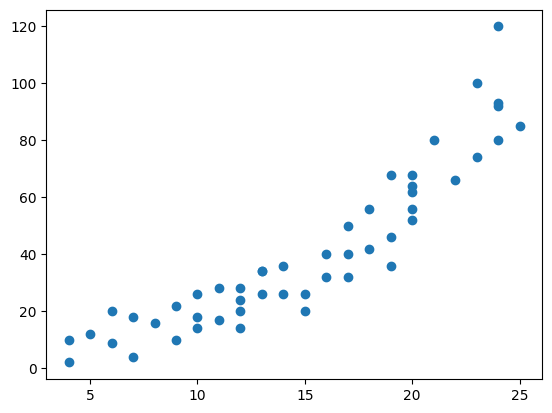

In [37]:
# (1c) – meine Lösung


plt.scatter(df['geschwindigkeit'], df['distanz'], )
y_pred = model_lin.predict(df[['geschwindigkeit']])
R2 = model_lin.lin.rsquared
res = y - y_pred
plt.scatter(df['geschwindigkeit'], df['distanz'], )

### (1d) R^2 berechnen & kurz interpretieren – *meine Notizen*

In [38]:
y_pred = model_lin.predict(df[['geschwindigkeit']])


### (1e) Residuen berechnen & plotten – *meine Notizen*

In [ ]:
# (1e) – meine Lösung
def aufgabe_1e(df, x_col: str, y_col: str, model):
    X = np.asarray(df[[x_col]], dtype=float)
    y = np.asarray(df[y_col], dtype=float)
    yhat = model.predict(X)
    resid = y - yhat

    # Residuen vs. Fitted
    plt.figure()
    plt.scatter(yhat, resid, alpha=0.8, edgecolor="none")
    plt.axhline(0, ls="--"); plt.xlabel("ŷ"); plt.ylabel("Residuen")
    plt.title("Residuen vs. ŷ"); plt.grid(True, alpha=0.25); plt.tight_layout(); plt.show()

    # Residuen vs. x
    plt.figure()
    plt.scatter(df[x_col], resid, alpha=0.8, edgecolor="none")
    plt.axhline(0, ls="--"); plt.xlabel(x_col); plt.ylabel("Residuen")
    plt.title("Residuen vs. x"); plt.grid(True, alpha=0.25); plt.tight_layout(); plt.show()

    # Histogramm
    plt.figure()
    plt.hist(resid, bins="auto")
    plt.xlabel("Residuen"); plt.ylabel("Häufigkeit")
    plt.title("Histogramm der Residuen"); plt.grid(True, alpha=0.25)
    plt.tight_layout(); plt.show()
    return yhat, resid

### (1f) Residuentest (leicht) – *meine Notizen*

In [ ]:
# (1f) – meine Lösung
def durbin_watson(resid):
    resid = np.asarray(resid, dtype=float)
    num = np.sum(np.diff(resid)**2)
    den = np.sum(resid**2)
    return float(num/den) if den > 0 else float("nan")

def aufgabe_1f(yhat, resid):
    DW = durbin_watson(resid)
    skew = pd.Series(resid).skew()
    kurt = pd.Series(resid).kurt()
    print(f"Durbin–Watson ≈ {DW:.3f}  |  Schiefe = {skew:.3f}  |  Kurtosis = {kurt:.3f}")
    # TODO: kurze Bewertung in Markdown (≈2 -> ok bzgl. Autokorrelation; Schiefe/Kurt nahe 0 -> grob normal)
    return {"DW": DW, "skew": float(skew), "kurt": float(kurt)}

### (1g) Schlussfolgerung zum Modell – *meine Notizen*

In [ ]:
# (1g) – meine Lösung
def aufgabe_1g(r2, resid, df, x_col):
    # TODO: Entscheidungstext in Markdown schreiben.
    # Optional: einfache Heuristik für Hinweise
    x = np.asarray(df[[x_col]], dtype=float).ravel()
    corr_x2 = np.corrcoef(x**2, resid)[0,1]
    print(f"Hinweis-Check (Korrelation resid ~ x^2): {corr_x2:.3f}")
    # -> Bei U-Form/Trichter: Transformation (z.B. sqrt(y)) oder x^2-Term prüfen.